In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

In [ ]:
traffic_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_condition')
customer_distance = ctrl.Antecedent(np.arange(0, 11, 1), 'customer_distance')
weather_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'weather_condition')
order_prep_time = ctrl.Antecedent(np.arange(0, 11, 1), 'order_prep_time')
driver_fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'driver_fatigue')

delivery_time = ctrl.Consequent(np.arange(0, 11, 1), 'delivery_time')
tip_bonus = ctrl.Consequent(np.arange(0, 11, 1), 'tip_bonus')
driver_rating = ctrl.Consequent(np.arange(0, 11, 1), 'driver_rating')

In [ ]:
traffic_condition['low'] = fuzz.trimf(traffic_condition.universe, [0, 0, 3])
traffic_condition['medium'] = fuzz.trimf(traffic_condition.universe, [2, 5, 8])
traffic_condition['high'] = fuzz.trimf(traffic_condition.universe, [7, 10, 10])

customer_distance['short'] = fuzz.trimf(customer_distance.universe, [0, 0, 3])
customer_distance['medium'] = fuzz.trimf(customer_distance.universe, [2, 5, 8])
customer_distance['long'] = fuzz.trimf(customer_distance.universe, [7, 10, 10])


weather_condition['clear'] = fuzz.trimf(weather_condition.universe, [0, 0, 3])
weather_condition['rainy'] = fuzz.trimf(weather_condition.universe, [2, 5, 8])
weather_condition['stormy'] = fuzz.trimf(weather_condition.universe, [7, 10, 10])


order_prep_time['fast'] = fuzz.trimf(order_prep_time.universe, [0, 0, 3])
order_prep_time['medium'] = fuzz.trimf(order_prep_time.universe, [2, 5, 8])
order_prep_time['slow'] = fuzz.trimf(order_prep_time.universe, [7, 10, 10])

driver_fatigue['low'] = fuzz.trimf(driver_fatigue.universe, [0, 0, 3])
driver_fatigue['medium'] = fuzz.trimf(driver_fatigue.universe, [2, 5, 8])
driver_fatigue['high'] = fuzz.trimf(driver_fatigue.universe, [7, 10, 10])


delivery_time['short'] = fuzz.trimf(delivery_time.universe, [0, 0, 3])
delivery_time['medium'] = fuzz.trimf(delivery_time.universe, [2, 5, 8])
delivery_time['long'] = fuzz.trimf(delivery_time.universe, [7, 10, 10])

tip_bonus['low'] = fuzz.trimf(tip_bonus.universe, [0, 0, 3])
tip_bonus['medium'] = fuzz.trimf(tip_bonus.universe, [2, 5, 8])
tip_bonus['high'] = fuzz.trimf(tip_bonus.universe, [7, 10, 10])


driver_rating['poor'] = fuzz.trimf(driver_rating.universe, [0, 0, 3])
driver_rating['average'] = fuzz.trimf(driver_rating.universe, [2, 5, 8])
driver_rating['excellent'] = fuzz.trimf(driver_rating.universe, [7, 10, 10])

In [ ]:


rule1 = ctrl.Rule(traffic_condition['low'] & customer_distance['short'], delivery_time['short'])
rule2 = ctrl.Rule(traffic_condition['medium'] & customer_distance['medium'], delivery_time['medium'])
rule3 = ctrl.Rule(traffic_condition['high'] & customer_distance['long'], delivery_time['long'])
rule4 = ctrl.Rule(weather_condition['clear'], tip_bonus['low'])
rule5 = ctrl.Rule(weather_condition['rainy'], tip_bonus['medium'])
rule6 = ctrl.Rule(weather_condition['stormy'], tip_bonus['high'])
rule7 = ctrl.Rule(order_prep_time['fast'] & traffic_condition['low'], delivery_time['short'])
rule8 = ctrl.Rule(order_prep_time['medium'] & traffic_condition['medium'], delivery_time['medium'])
rule9 = ctrl.Rule(order_prep_time['slow'] & traffic_condition['high'], delivery_time['long'])
rule10 = ctrl.Rule(driver_fatigue['low'], driver_rating['excellent'])
rule11 = ctrl.Rule(driver_fatigue['medium'], driver_rating['average'])
rule12 = ctrl.Rule(driver_fatigue['high'], driver_rating['poor'])
rule13 = ctrl.Rule(customer_distance['long'] & weather_condition['stormy'] & traffic_condition['high'],
                   (delivery_time['long'], tip_bonus['high']))
rule14 = ctrl.Rule(customer_distance['short'] & weather_condition['clear'] & traffic_condition['low'],
                   (delivery_time['short'], tip_bonus['low']))
rule15 = ctrl.Rule(driver_fatigue['high'] & traffic_condition['high'],
                   (driver_rating['poor'], delivery_time['long']))



fuzzy_control_system = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
    rule10, rule11, rule12, rule13, rule14, rule15
])
fuzzy_simulation = ctrl.ControlSystemSimulation(fuzzy_control_system)


Thời gian giao hàng ước tính: 5.0 phút
Tiền thưởng khuyến khích: 8.7%
Xếp hạng hiệu suất tài xế: 5.0/10


<Figure size 1000x300 with 0 Axes>

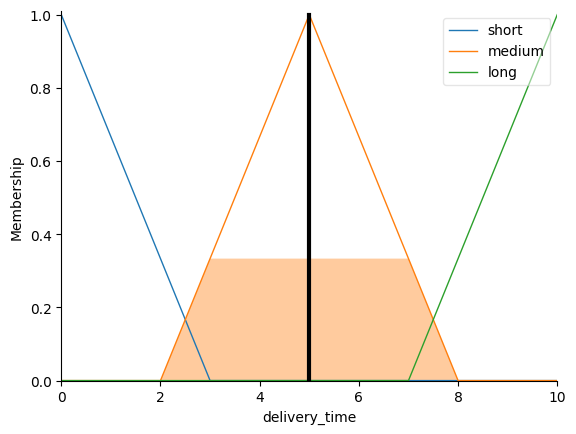

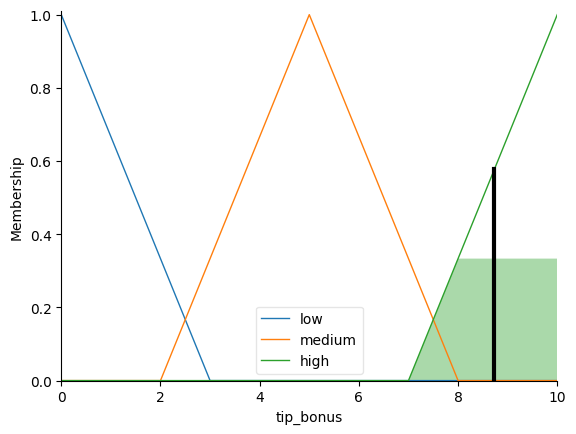

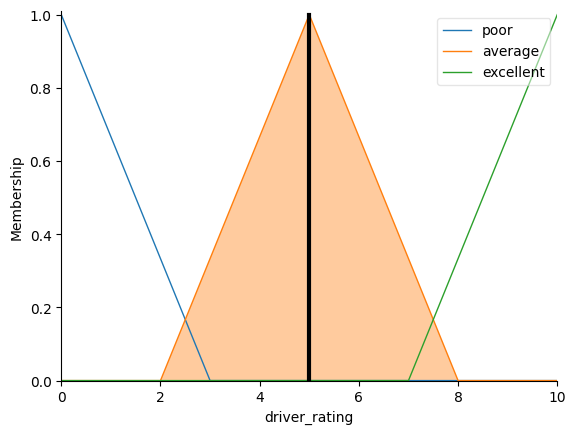

In [ ]:
fuzzy_simulation.input['traffic_condition'] = 7
fuzzy_simulation.input['customer_distance'] = 9
fuzzy_simulation.input['weather_condition'] = 8
fuzzy_simulation.input['order_prep_time'] = 6
fuzzy_simulation.input['driver_fatigue'] = 5
fuzzy_simulation.compute()

print(f"Thời gian giao hàng ước tính: {fuzzy_simulation.output['delivery_time']:.1f} phút")
print(f"Tiền thưởng khuyến khích: {fuzzy_simulation.output['tip_bonus']:.1f}%")
print(f"Xếp hạng hiệu suất tài xế: {fuzzy_simulation.output['driver_rating']:.1f}/10")

plt.figure(figsize=(10, 3))
delivery_time.view(sim=fuzzy_simulation)
tip_bonus.view(sim=fuzzy_simulation)
driver_rating.view(sim=fuzzy_simulation)
plt.show()